In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from joblib import Parallel, delayed
from ripser import ripser
from torchvision.transforms.transforms import RandomAffine, InterpolationMode, Compose


In [2]:
inspect_list = np.linspace(0, 12, 1000)

def ft():
    result = []
    for _ in range(n_points):
        result.append(tf(data))
    result = torch.concat(result).view(n_points, -1)
    dist_matrix = torch.cdist(result, result, compute_mode='donot_use_mm_for_euclid_dist').numpy()
    output = ripser(dist_matrix, maxdim=1, distance_matrix=True)

    result = np.zeros(len(inspect_list))
    _result = np.digitize(
        output['dgms'][1],
        inspect_list)
    for el in _result:
        result[el[0]: el[1]] += 1

    return result


In [3]:
tf = Compose([
    RandomAffine(degrees=(0, 360), translate=(0.0, 0.0), interpolation=InterpolationMode.BILINEAR)
    # RandomAffine(degrees=(0, 360), translate=(0.1, 0.1), interpolation=InterpolationMode.BILINEAR)
])
data = np.zeros((1, 28, 28))
data[:, 12:-12, 4:-4] += 1
data = torch.from_numpy(data)


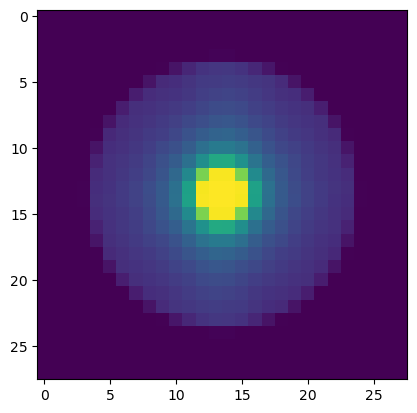

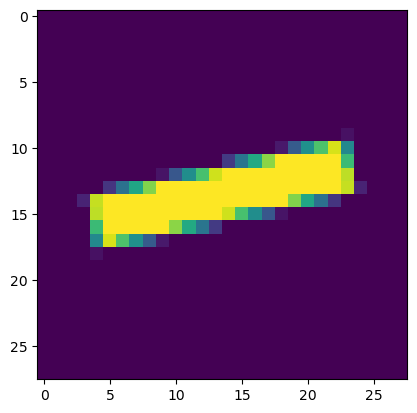

In [4]:
test_data = torch.concat([tf(data) for _ in range(1000)])
plt.imshow(test_data.mean(axis=0))
plt.show()
plt.imshow(test_data[0])
plt.show()


In [5]:
n_exp = 2000
final_results = []
n_points_list = [4, 8, 16, 32, 64, 128, 256, 512, 1024]
for n_points in n_points_list:
    final_results.append(np.asarray(Parallel(n_jobs=26, verbose=9)(delayed(ft)() for _ in range(n_exp))))


[Parallel(n_jobs=26)]: Using backend LokyBackend with 26 concurrent workers.
[Parallel(n_jobs=26)]: Done  20 tasks      | elapsed:    1.8s
[Parallel(n_jobs=26)]: Done  46 tasks      | elapsed:    1.9s
[Parallel(n_jobs=26)]: Done  76 tasks      | elapsed:    2.0s
[Parallel(n_jobs=26)]: Done 110 tasks      | elapsed:    2.1s
[Parallel(n_jobs=26)]: Done 149 tasks      | elapsed:    2.2s
[Parallel(n_jobs=26)]: Done 224 tasks      | elapsed:    2.3s
[Parallel(n_jobs=26)]: Done 372 tasks      | elapsed:    2.5s
[Parallel(n_jobs=26)]: Done 676 tasks      | elapsed:    2.7s
[Parallel(n_jobs=26)]: Done 1332 tasks      | elapsed:    2.9s
[Parallel(n_jobs=26)]: Done 1750 tasks      | elapsed:    3.1s
[Parallel(n_jobs=26)]: Done 1812 tasks      | elapsed:    3.3s
[Parallel(n_jobs=26)]: Done 1878 tasks      | elapsed:    3.5s
[Parallel(n_jobs=26)]: Done 1948 tasks      | elapsed:    3.8s
[Parallel(n_jobs=26)]: Done 2000 out of 2000 | elapsed:    3.9s finished
[Parallel(n_jobs=26)]: Using backend Lo

In [6]:
import pickle
with open('tmp1.pkl', 'wb') as f:
    pickle.dump(final_results, f)

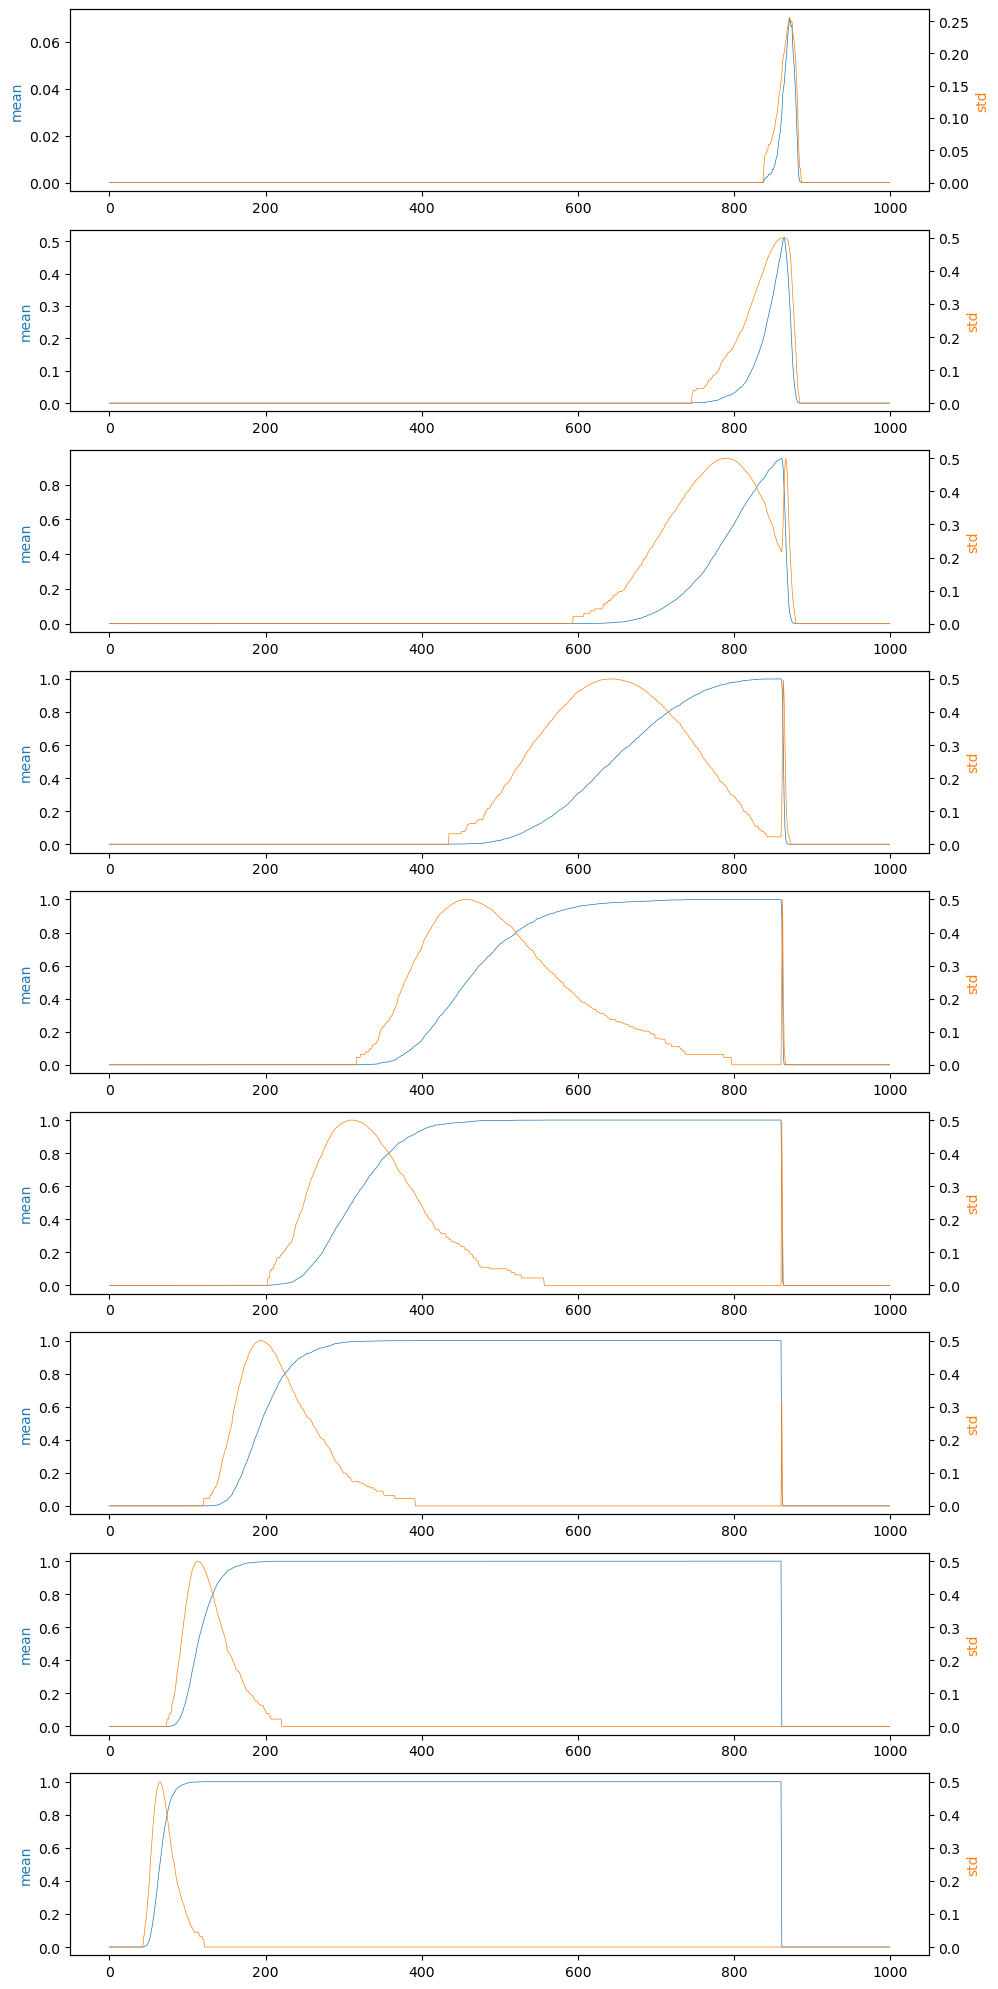

In [9]:
fig, axs = plt.subplots(len(n_points_list), 1, figsize=(10, 20))
for i in range(len(n_points_list)):
    axs[i].plot(final_results[i].mean(axis=0), c='C0', lw=0.5)
    axs[i].set_ylabel('mean', color='C0')
    ax2 = axs[i].twinx()
    ax2.plot(final_results[i].std(axis=0), c='C1', lw=0.5)
    ax2.set_ylabel('std', color='C1')
plt.tight_layout()
plt.show()


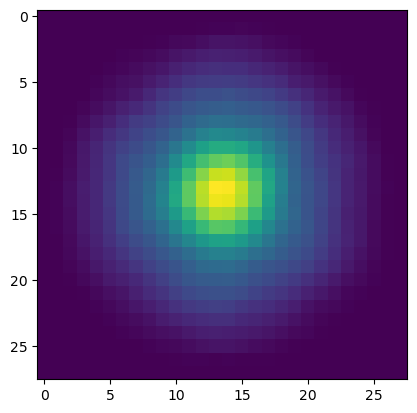

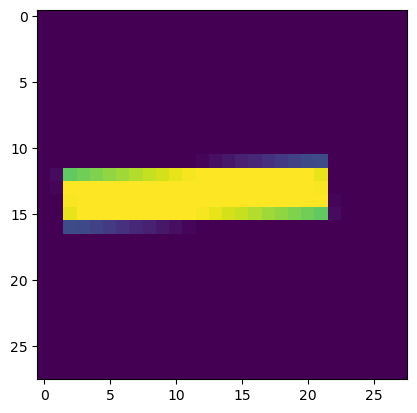

In [10]:
tf = Compose([
    # RandomAffine(degrees=(0, 360), translate=(0.0, 0.0), interpolation=InterpolationMode.BILINEAR)
    RandomAffine(degrees=(0, 360), translate=(0.1, 0.1), interpolation=InterpolationMode.BILINEAR)
])

test_data = torch.concat([tf(data) for _ in range(1000)])
plt.imshow(test_data.mean(axis=0))
plt.show()
plt.imshow(test_data[0])
plt.show()

In [11]:
n_exp = 1000
final_results = []
n_points_list = [4, 8, 16, 32, 64, 128, 256, 512, 1024]
for n_points in n_points_list:
    final_results.append(np.asarray(Parallel(n_jobs=26, verbose=9)(delayed(ft)() for _ in range(n_exp))))


[Parallel(n_jobs=26)]: Using backend LokyBackend with 26 concurrent workers.
[Parallel(n_jobs=26)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=26)]: Done  47 tasks      | elapsed:    0.2s
[Parallel(n_jobs=26)]: Done 100 tasks      | elapsed:    0.3s
[Parallel(n_jobs=26)]: Done 180 tasks      | elapsed:    0.4s
[Parallel(n_jobs=26)]: Done 332 tasks      | elapsed:    0.6s
[Parallel(n_jobs=26)]: Done 636 tasks      | elapsed:    0.7s
[Parallel(n_jobs=26)]: Done 808 tasks      | elapsed:    0.8s
[Parallel(n_jobs=26)]: Done 858 tasks      | elapsed:    0.9s
[Parallel(n_jobs=26)]: Done 912 tasks      | elapsed:    1.0s
[Parallel(n_jobs=26)]: Done 1000 out of 1000 | elapsed:    1.2s finished
[Parallel(n_jobs=26)]: Using backend LokyBackend with 26 concurrent workers.
[Parallel(n_jobs=26)]: Done  20 tasks      | elapsed:    0.2s
[Parallel(n_jobs=26)]: Done  46 tasks      | elapsed:    0.2s
[Parallel(n_jobs=26)]: Done 100 tasks      | elapsed:    0.3s
[Parallel(n_jobs=26)]: Done 1

In [12]:
import pickle
with open('tmp2.pkl', 'wb') as f:
    pickle.dump(final_results, f)

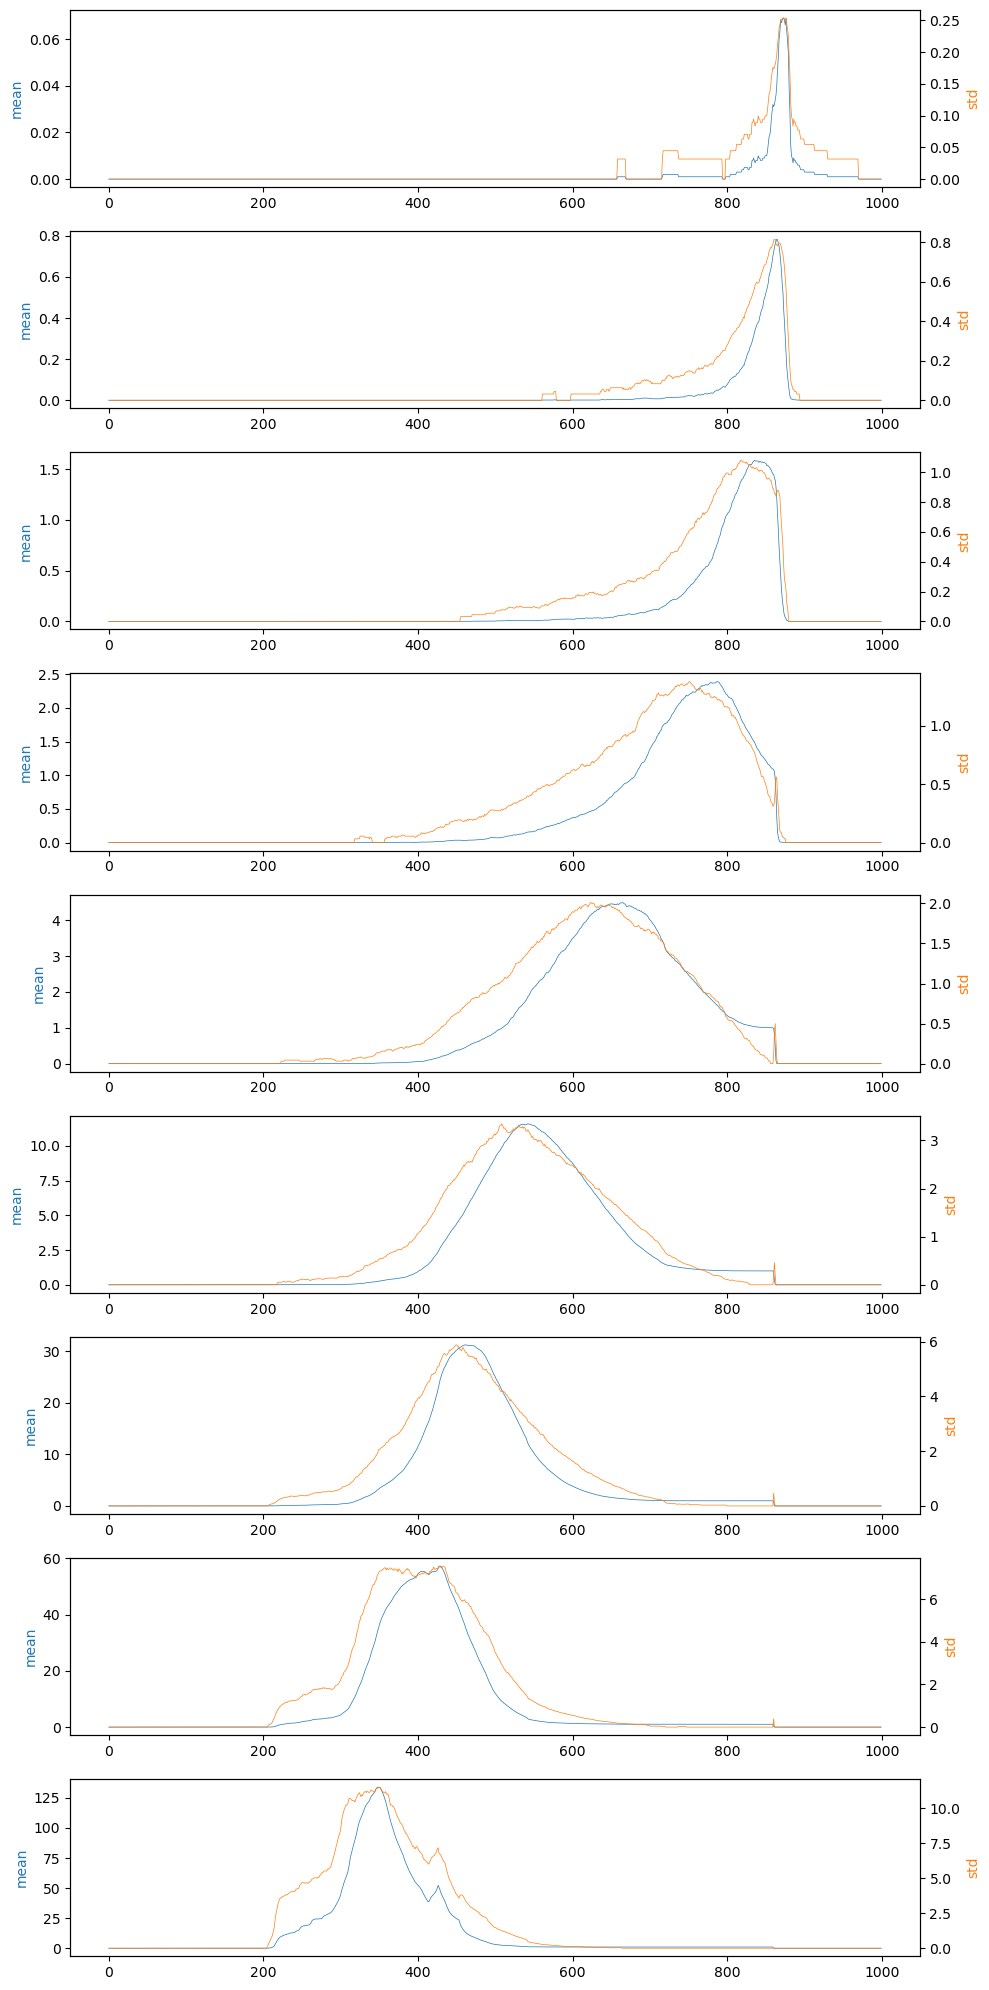

In [13]:
fig, axs = plt.subplots(len(n_points_list), 1, figsize=(10, 20))
for i in range(len(n_points_list)):
    axs[i].plot(final_results[i].mean(axis=0), c='C0', lw=0.5)
    axs[i].set_ylabel('mean', color='C0')
    ax2 = axs[i].twinx()
    ax2.plot(final_results[i].std(axis=0), c='C1', lw=0.5)
    ax2.set_ylabel('std', color='C1')
plt.tight_layout()
plt.show()


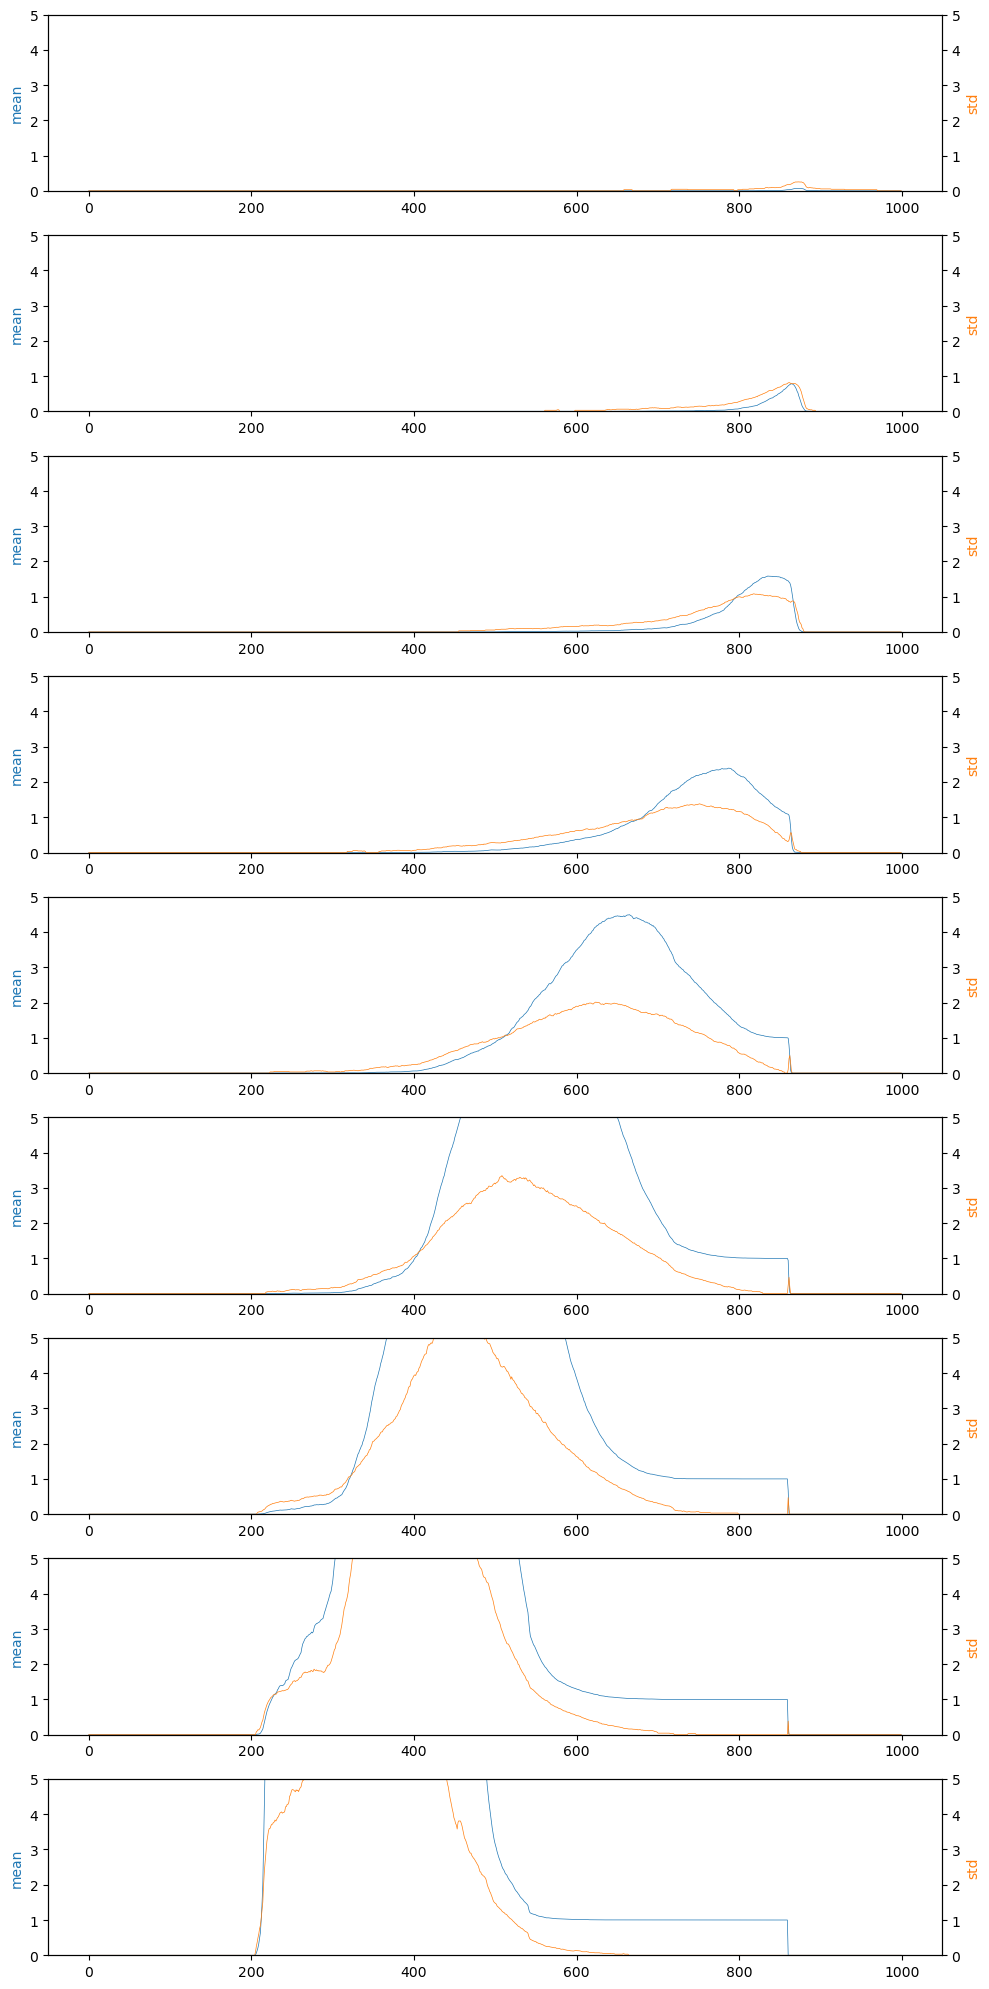

In [14]:
fig, axs = plt.subplots(len(n_points_list), 1, figsize=(10, 20))
for i in range(len(n_points_list)):
    axs[i].plot(final_results[i].mean(axis=0), c='C0', lw=0.5)
    axs[i].set_ylabel('mean', color='C0')
    axs[i].set_ylim(0, 5)
    ax2 = axs[i].twinx()
    ax2.plot(final_results[i].std(axis=0), c='C1', lw=0.5)
    ax2.set_ylabel('std', color='C1')
    ax2.set_ylim(0, 5)
plt.tight_layout()
plt.show()
